# Coffee Data Analysis and Visualization

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

## Clean and prepare the data

In [3]:
dfs=[pd.read_csv(df_path) for df_path in df_paths]

In [4]:
#process data 2
#making mean value of every df columns and attaching it to country

def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df



In [5]:
#process data 2
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

/tmp/ipykernel_35522/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_35522/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_35522/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_35522/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this wi

In [6]:
##rename columns and output to same csv (already done, doesn't need running)
#df = df.rename(columns={'1990/91': '1990', '1991/92': '1991', '1992/93': '1992', '1993/94': '1993', '1994/95': '1994', '1995/96': '1995', '1996/97': '1996', '1997/98': '1997', '1998/99': '1998', '1999/00': '1999', '2000/01': '2000', '2001/02': '2001', '2002/03': '2002', '2003/04': '2003', '2004/05': '2004', '2005/06': '2005', '2006/07': '2006', '2007/08': '2007', '2008/09': '2008', '2009/10': '2009', '2010/11': '2010', '2011/12': '2011', '2012/13': '2012', '2013/14': '2013', '2014/15': '2014', '2015/16': '2015', '2016/17': '2016', '2017/18': '2017', '2018/19': '2018', '2019/20': '2019'})
#df.to_csv('Domestic_Coffee_Consumption.csv')

In [7]:
#Ensure no null values exist in our data
data.isna().sum() #returns False for all
data = data.dropna()

In [8]:
#Ensure no duplicate rows exist in our data
data.loc[data.duplicated()] #Nothing returned
data = data.drop_duplicates()

In [9]:
#reset data frame and index, sorting by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)
data = data.reset_index(drop=True)

## Analysis and Visualization

Text(0, 0.5, 'Domestic Consumption')

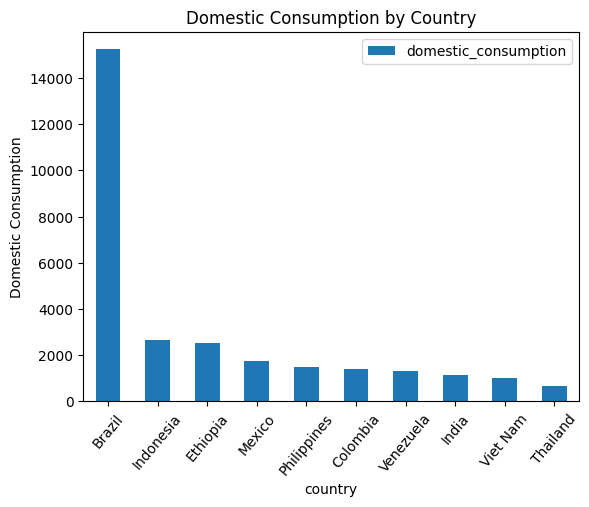

In [10]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

Text(0, 0.5, 'Coffee Exports')

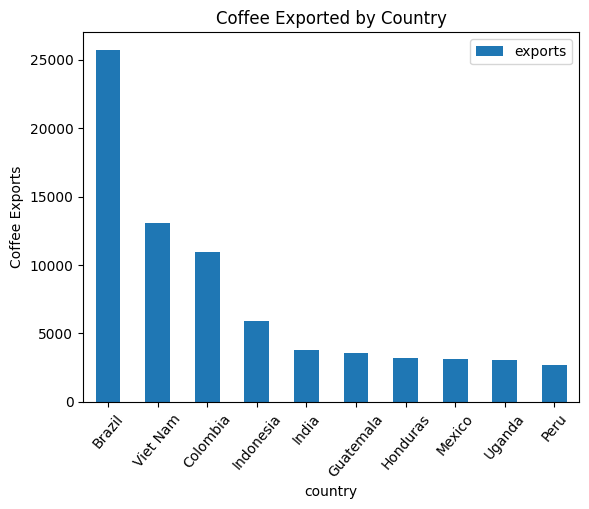

In [11]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [12]:
#Drop the outlier in the data (Brazil)
data = data.drop(data.query("country=='Brazil'").index)
data = data.sort_values(by='domestic_consumption', ascending=False)

Text(0, 0.5, 'Domestic Consumption')

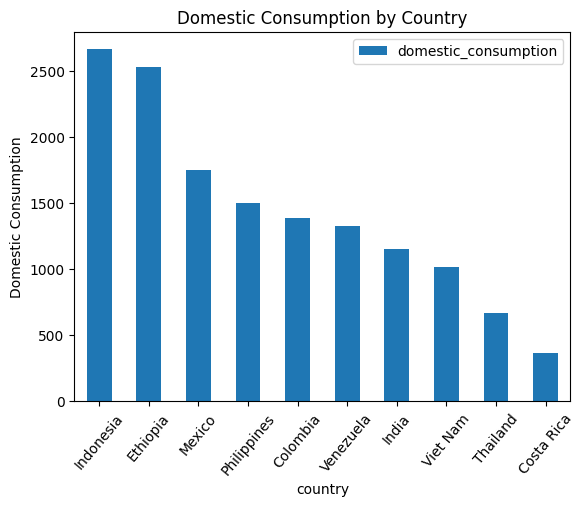

In [13]:
#Create same bar graph, but exclude Brazil
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

Text(0, 0.5, 'Coffee Exports')

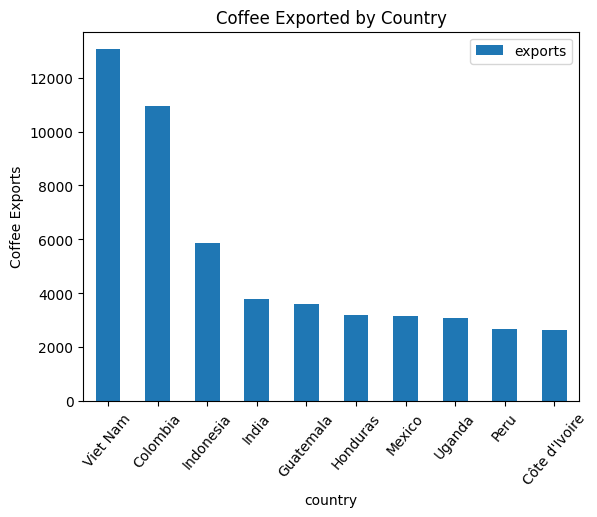

In [14]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [15]:
#Create new dataframe off only numeric fields, create correlation map
stats = data[['exports', 'domestic_consumption', 'exports_crop_year', 'gross_opening_stocks', 'total_production']]
stats.corr()

,exports,domestic_consumption,exports_crop_year,gross_opening_stocks,total_production
exports,1.000000,0.531461,0.999601,0.779306,0.988202
domestic_consumption,0.531461,1.000000,0.525576,0.699045,0.641531
exports_crop_year,0.999601,0.525576,1.000000,0.774267,0.988120
gross_opening_stocks,0.779306,0.699045,0.774267,1.000000,0.809914
total_production,0.988202,0.641531,0.988120,0.809914,1.000000


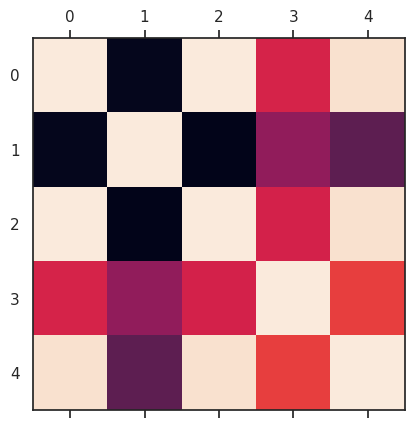

In [16]:
#Create heatmap of correlated data
sns.set_theme(style="white")
corr = stats.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)

<Axes: title={'center': 'South/Central American Domestic Consumption x Exports'}, xlabel='Exports', ylabel='Domestic Consumption'>

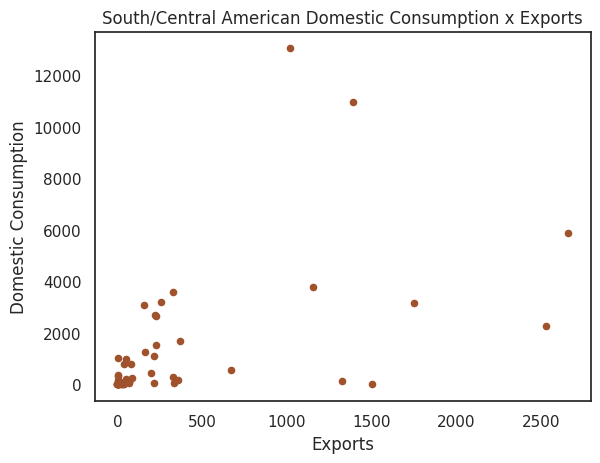

In [17]:
#Scatter plot comparing domestic consumption x exports
data.plot(kind='scatter', x='domestic_consumption', y='exports', title='South/Central American Domestic Consumption x Exports', xlabel = 'Exports', ylabel = 'Domestic Consumption', c='sienna')

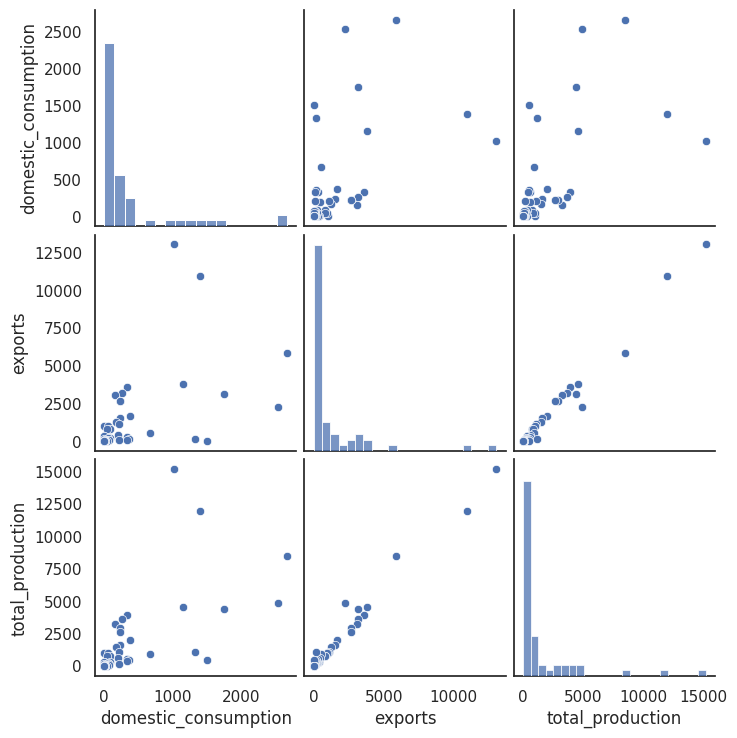

In [18]:
#Create a grid of pairplots between domestic consumption, exports, and production
sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])

In [85]:
#Read in new data file
df = pd.read_csv('./data/Domestic_Coffee_Consumption.csv')
df.head()

,Unnamed: 0,Country,Coffee type,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_domestic_consumption
0,0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,1,Bolivia,Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [48]:
#Create new dataframe of coffee types, clean data a bit
types = df['Coffee type']
types = types.replace({'Robusta/Arabica':'Both'})
types = types.replace({'Arabica/Robusta':'Both'})
pie = types.value_counts()

<Axes: title={'center': 'Coffee Types Consumed in South/Central American Countries'}, ylabel='Coffee type'>

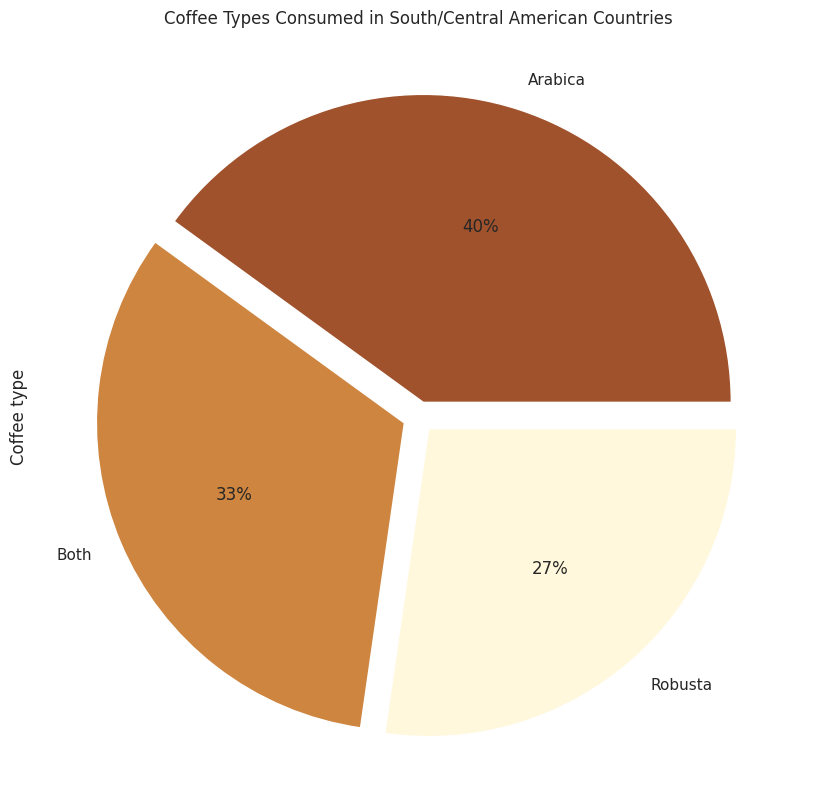

In [170]:
# Defining colors for the pie chart
colors = ['sienna', 'peru', 'cornsilk']
  
# Define the ratio of gap of each fragment in a tuple
x = (0.05, 0.05, 0.05)

#Create pie chart of coffee types
pie.plot(kind='pie', title="Coffee Types Consumed in South/Central American Countries", autopct='%1.0f%%', colors=colors, explode=x)

In [50]:
#reset data frame and index, sorting by domestic consumption
df = df.sort_values(by='2014', ascending=False)
df = df.reset_index(drop=True)
df = df.head(10)

[Text(0.5, 1.0, 'Coffee Consumption Across South/Central America Over Time')]

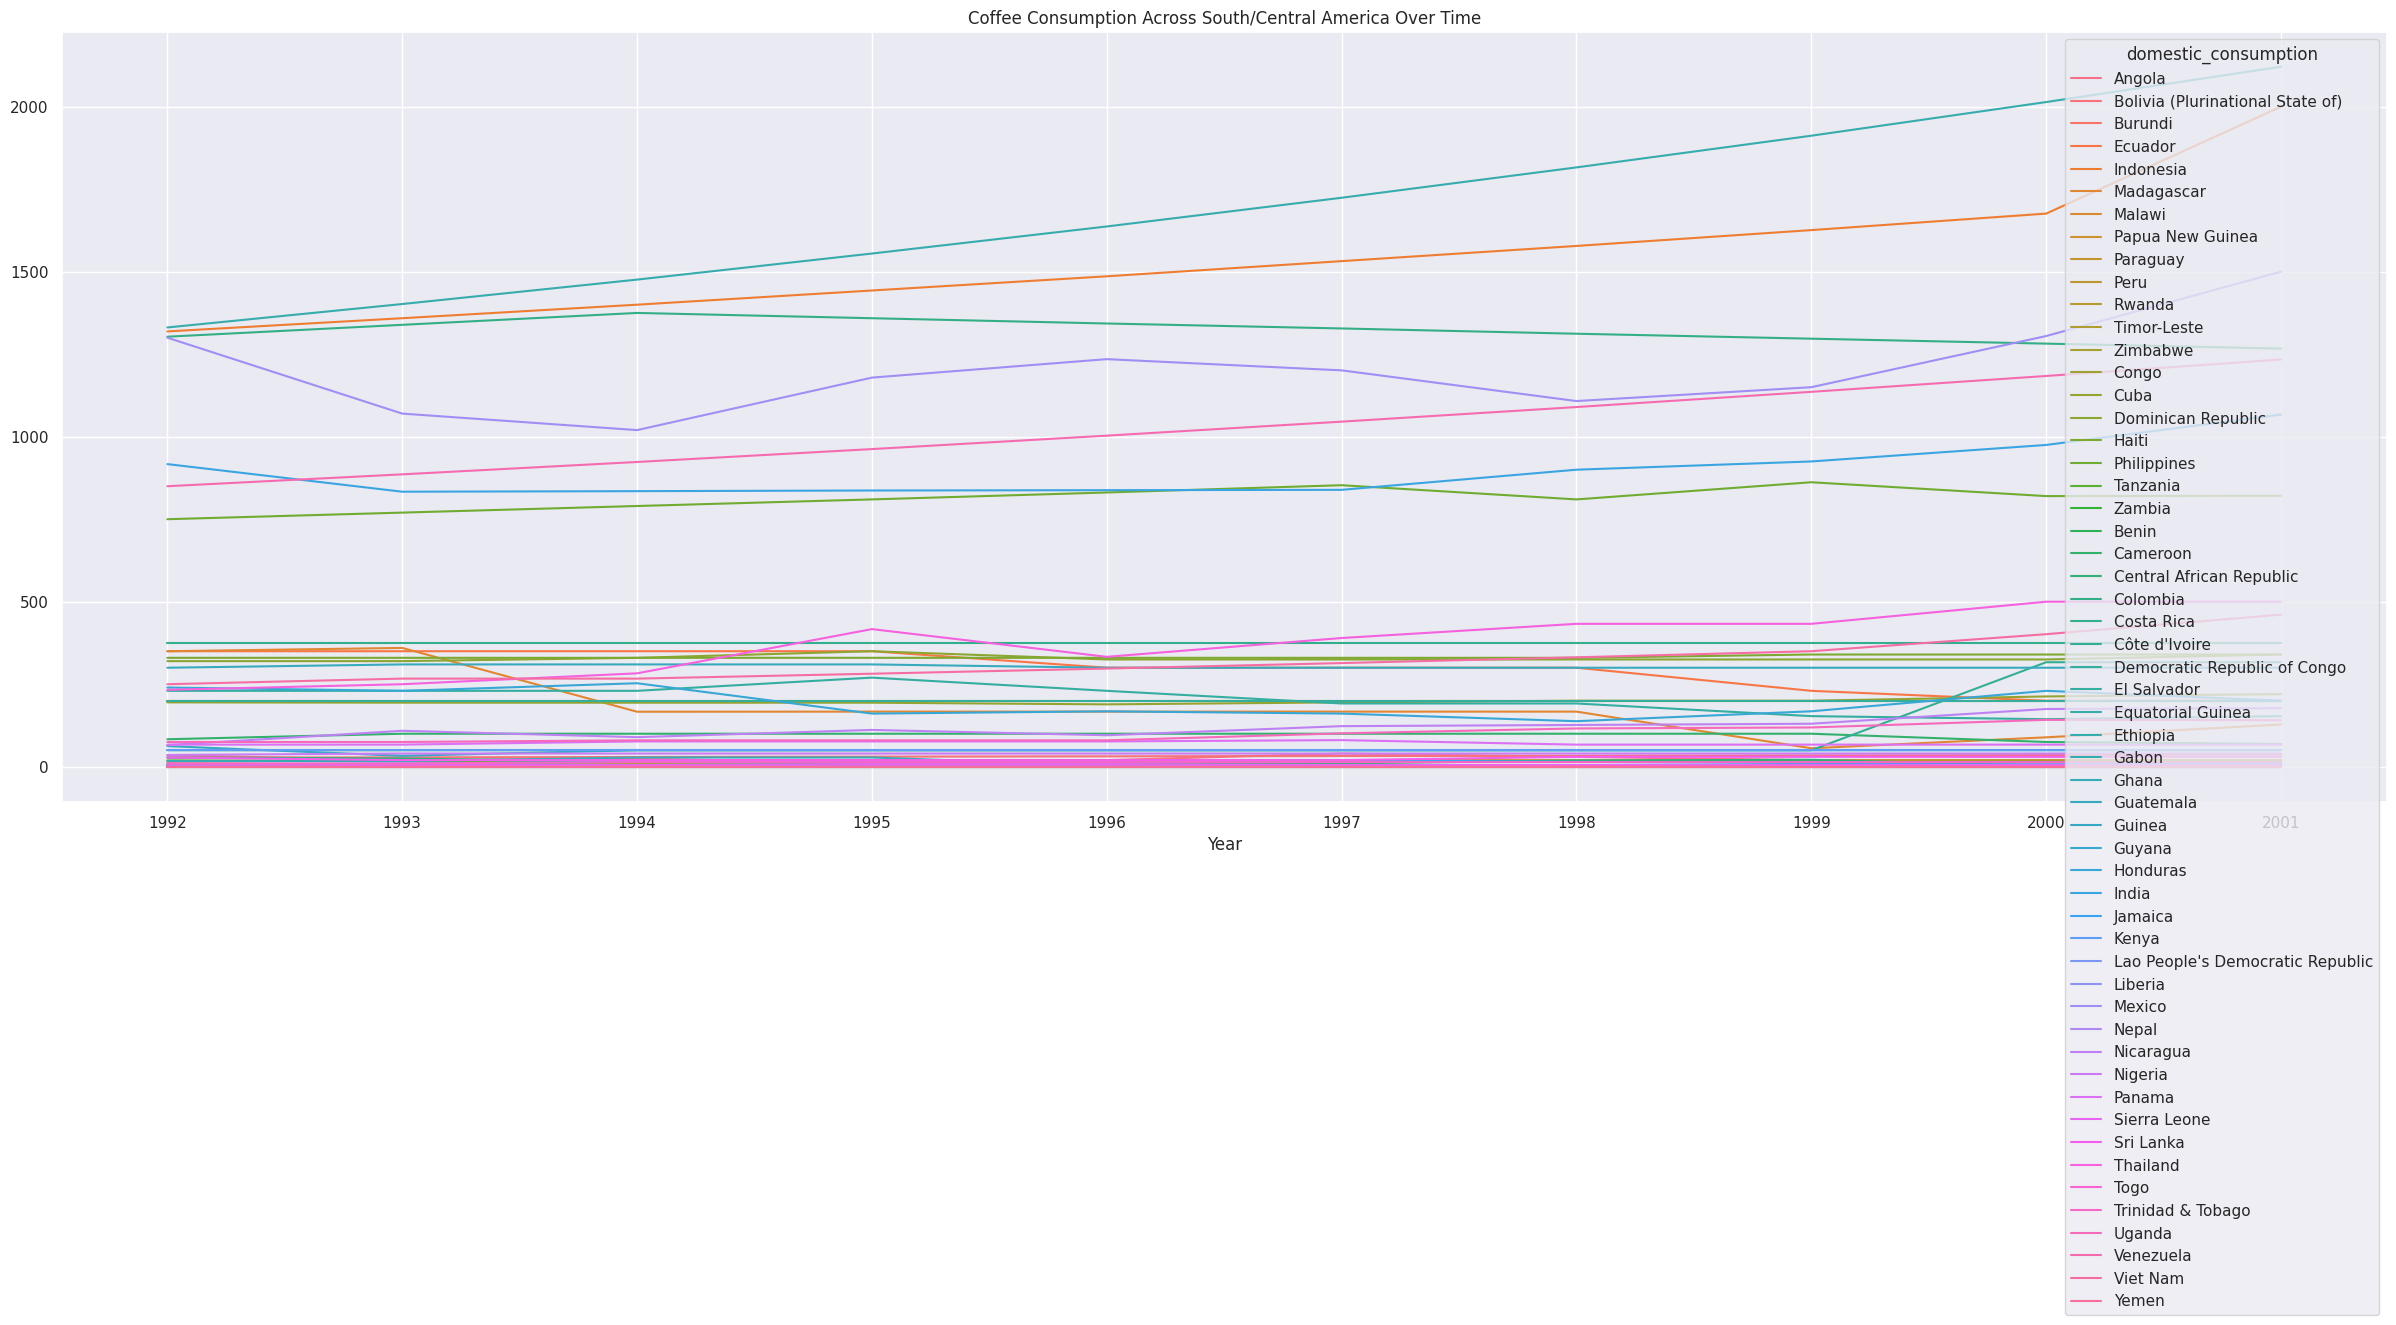

In [165]:
#Read in new data file
df = pd.read_csv('./data/domestic-consumption.csv')

#Transpose the data frame
pivot = df.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[0]

#drop first two rows
pivot = pivot.iloc[3:]

#rename index
pivot.index.names = ['Year']

pivot2 = pivot.copy()

#Drop the outlier in the data (Brazil)
pivot2.drop('Brazil', axis=1, inplace=True) 

top_ten_consume_overtime = pivot2.head(10)

#top_ten_consume_overtime.plot(title='Coffee Consumption Across South/Central America Over Time')

sns.set(rc={"figure.figsize":(30, 10)}) 

sns.lineplot(data=top_ten_consume_overtime, dashes=False).set(title="Coffee Consumption Across South/Central America Over Time")

# Analyze Brazil

In [166]:
#Reset pivot and create Brazil coffee consumption dataframe
pivot.drop(pivot.columns.difference(['Brazil']), 1, inplace=True)
Brazil_consume = pivot.copy()
Brazil_consume.rename(columns={'Brazil': 'consumption'}, inplace=True)
Brazil_consume.head()

/tmp/ipykernel_35522/2742735061.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot.drop(pivot.columns.difference(['Brazil']), 1, inplace=True)


domestic_consumption,consumption
Year,
1992,8900.0
1993,9100.0
1994,9300.0
1995,10100.0
1996,11000.0


In [167]:
#Create another Brazil dataframe from the production data
df = pd.read_csv('./data/total-production.csv')
pivot2 = df.transpose()
pivot2.columns = pivot2.iloc[0]
pivot2 = pivot2.drop('total_production')
pivot2.index.names = ['Year']
pivot2.drop(pivot2.columns.difference(['Brazil']), 1, inplace=True)
Brazil_prod = pivot2.copy()
Brazil_prod.rename(columns={'Brazil': 'production'}, inplace=True)
Brazil_prod.head()

/tmp/ipykernel_35522/3840761237.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot2.drop(pivot2.columns.difference(['Brazil']), 1, inplace=True)


total_production,production
Year,
1990,27285.6286
1991,27293.4934
1992,34603.3542
1993,28166.9786
1994,28192.047


In [168]:
#Combine the two
Brazil = pd.concat([Brazil_prod, Brazil_consume], axis=1)
Brazil.head()

,production,consumption
Year,,
1990,27285.6286,NaN
1991,27293.4934,NaN
1992,34603.3542,8900.0
1993,28166.9786,9100.0
1994,28192.047,9300.0


<Axes: title={'center': 'Coffee Production x Consumption in Brazil Over Time'}, xlabel='Year', ylabel='Coffee Consumed (kg)'>

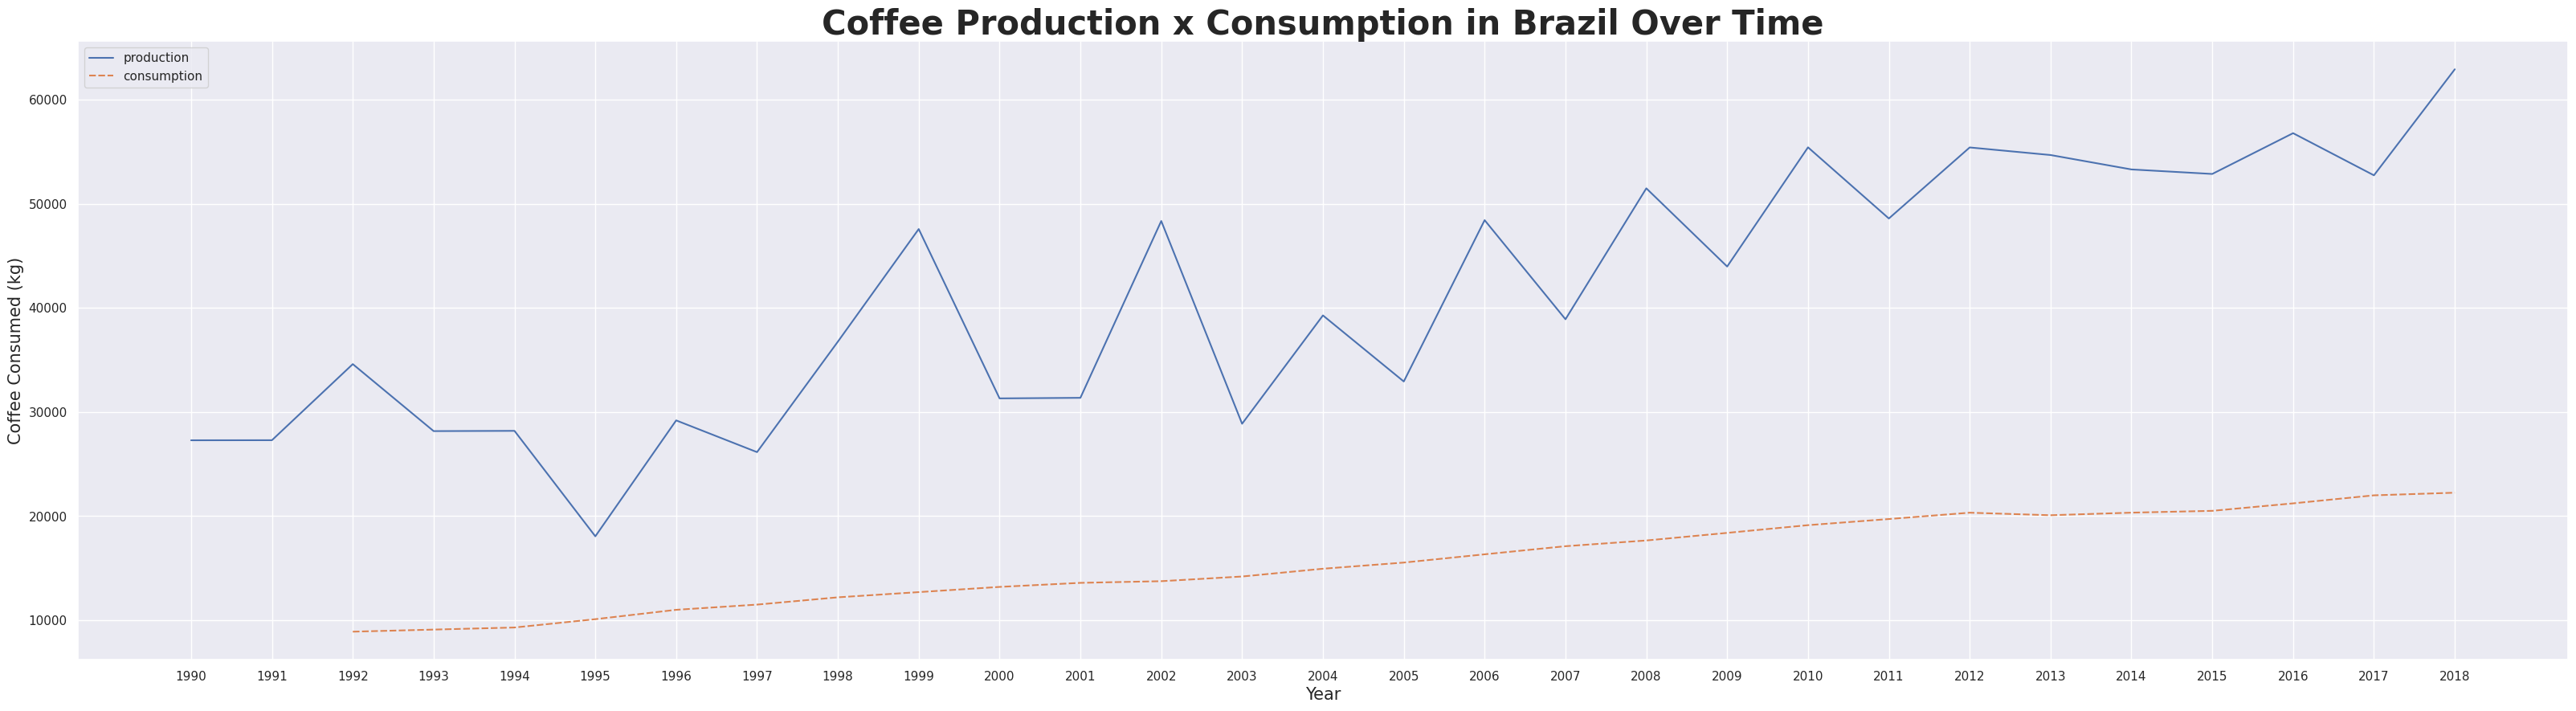

In [169]:
#Create line graph of Brazilian coffee consumption and production over time.
sns.set(rc={"figure.figsize":(40, 10)})
brazil_consumption = sns.lineplot(data=Brazil)
brazil_consumption.set_title('Coffee Production x Consumption in Brazil Over Time', fontdict={'size': 30, 'weight': 'bold'})
brazil_consumption.set_xlabel('Year', fontdict={'size': 15})
brazil_consumption.set_ylabel('Coffee Consumed (billion kg)', fontdict={'size': 15})
brazil_consumption

In [ ]:
#Create line graph of Brazilian coffee consumption over time.
sns.set(rc={"figure.figsize":(40, 10)})
brazil_consumption = sns.lineplot(data=Brazil)
brazil_consumption.set_title('Coffee Consumption in Brazil Over Time', fontdict={'size': 30, 'weight': 'bold'})
brazil_consumption.set_xlabel('Year', fontdict={'size': 15})
brazil_consumption.set_ylabel('Coffee Consumed (billion kg)', fontdict={'size': 15})
brazil_consumption

In [188]:
#Read in new data file
df = pd.read_csv('./data/retail-prices.csv')

#sort by retail price in 2018
data = df.sort_values(by='2018', ascending=False)
data = data.reset_index(drop=True)
data.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United Kingdom,23.289183,22.980132,22.273731,18.631347,25.077263,30.441501,29.470199,32.891832,34.039735,...,35.298013,34.657837,41.986755,42.384106,41.766004,45.386313,41.743929,35.960265,37.549669,40.618102
1,Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,...,16.953642,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945
2,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
3,Japan,22.649007,26.225166,27.858720,32.163355,32.428256,39.116998,33.642384,31.390728,29.845475,...,13.399558,14.105960,16.225166,16.710817,13.355408,12.538631,12.362031,13.708609,13.134658,12.803532
4,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457


<Axes: title={'center': 'Retail Price of Coffee Across Importing Countries Over Time'}, xlabel='Year', ylabel='Price of coffee per gram'>

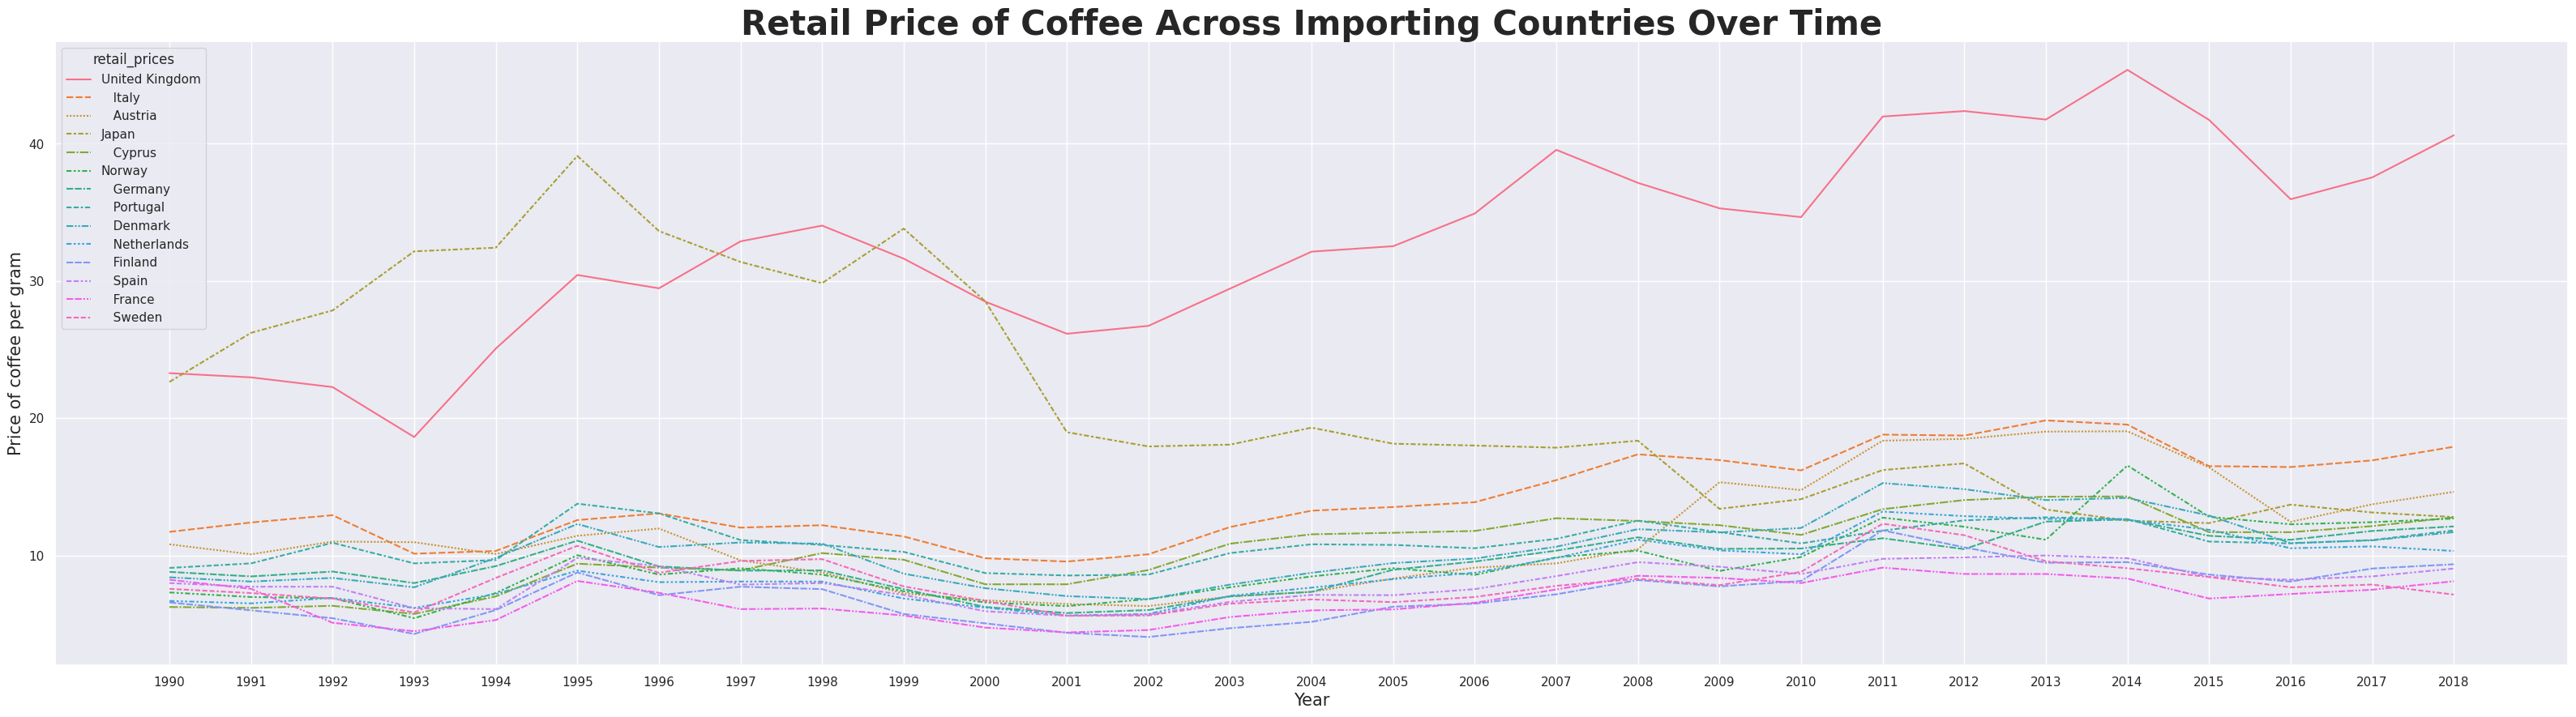

In [192]:
#Clean data and plot retail prices on line graph
pivot = data.transpose()
pivot.columns = pivot.iloc[0]
pivot = pivot.iloc[1:]
pivot.index.names = ['Year']
pivot['Years'] = pivot.index
retail_prices = sns.lineplot(data=pivot)
retail_prices.set_title('Retail Price of Coffee Across Importing Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
retail_prices.set_xlabel('Year', fontdict={'size': 15})
retail_prices.set_ylabel('Price of coffee per gram', fontdict={'size': 15})
retail_prices

/tmp/ipykernel_35522/3501751151.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot['average'] = df.mean()


<Axes: title={'center': 'Average Retail Price of Coffee Across Importing Countries Over Time'}, xlabel='Year', ylabel='Price of coffee per gram'>

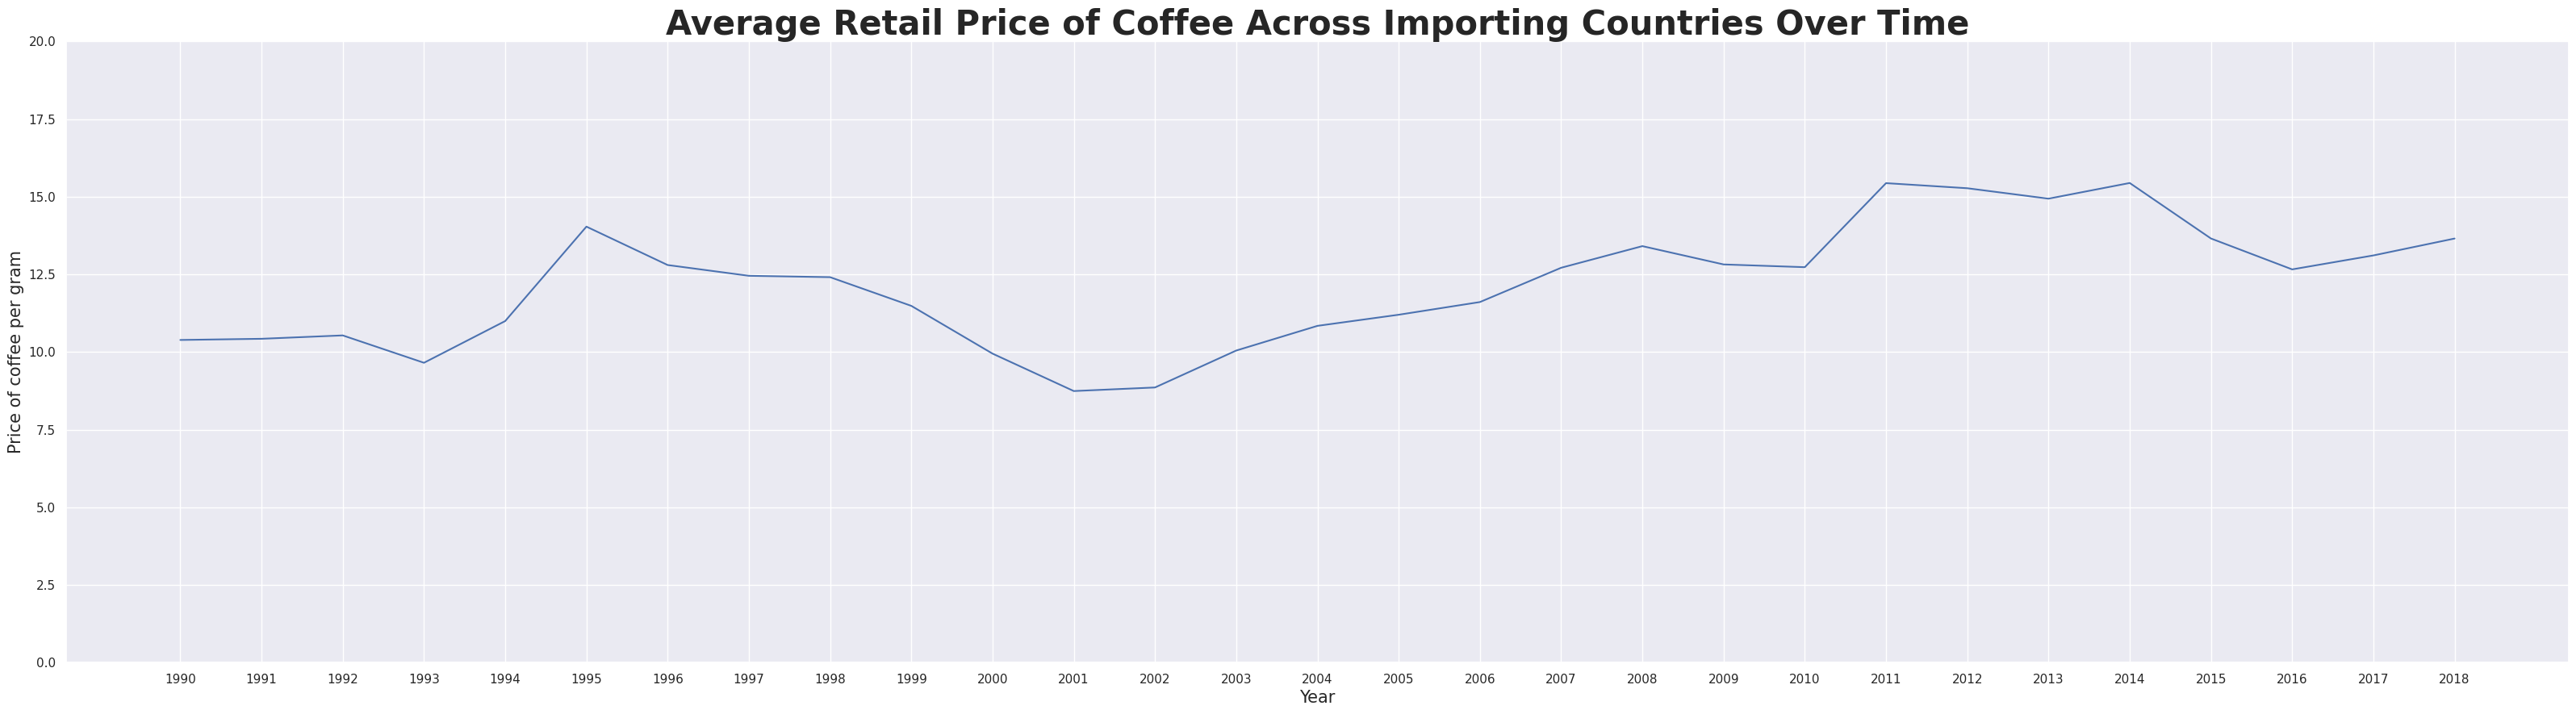

In [205]:
pivot['average'] = df.mean()
avg_price = sns.lineplot(data=pivot['average'])
avg_price.set_title('Average Retail Price of Coffee Across Importing Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
avg_price.set_xlabel('Year', fontdict={'size': 15})
avg_price.set_ylabel('Price of coffee per gram', fontdict={'size': 15})
plt.ylim(0, 20)
avg_price

<Axes: title={'center': 'Coffee Grower Pay Across South/Central America Over Time'}, xlabel='Year'>

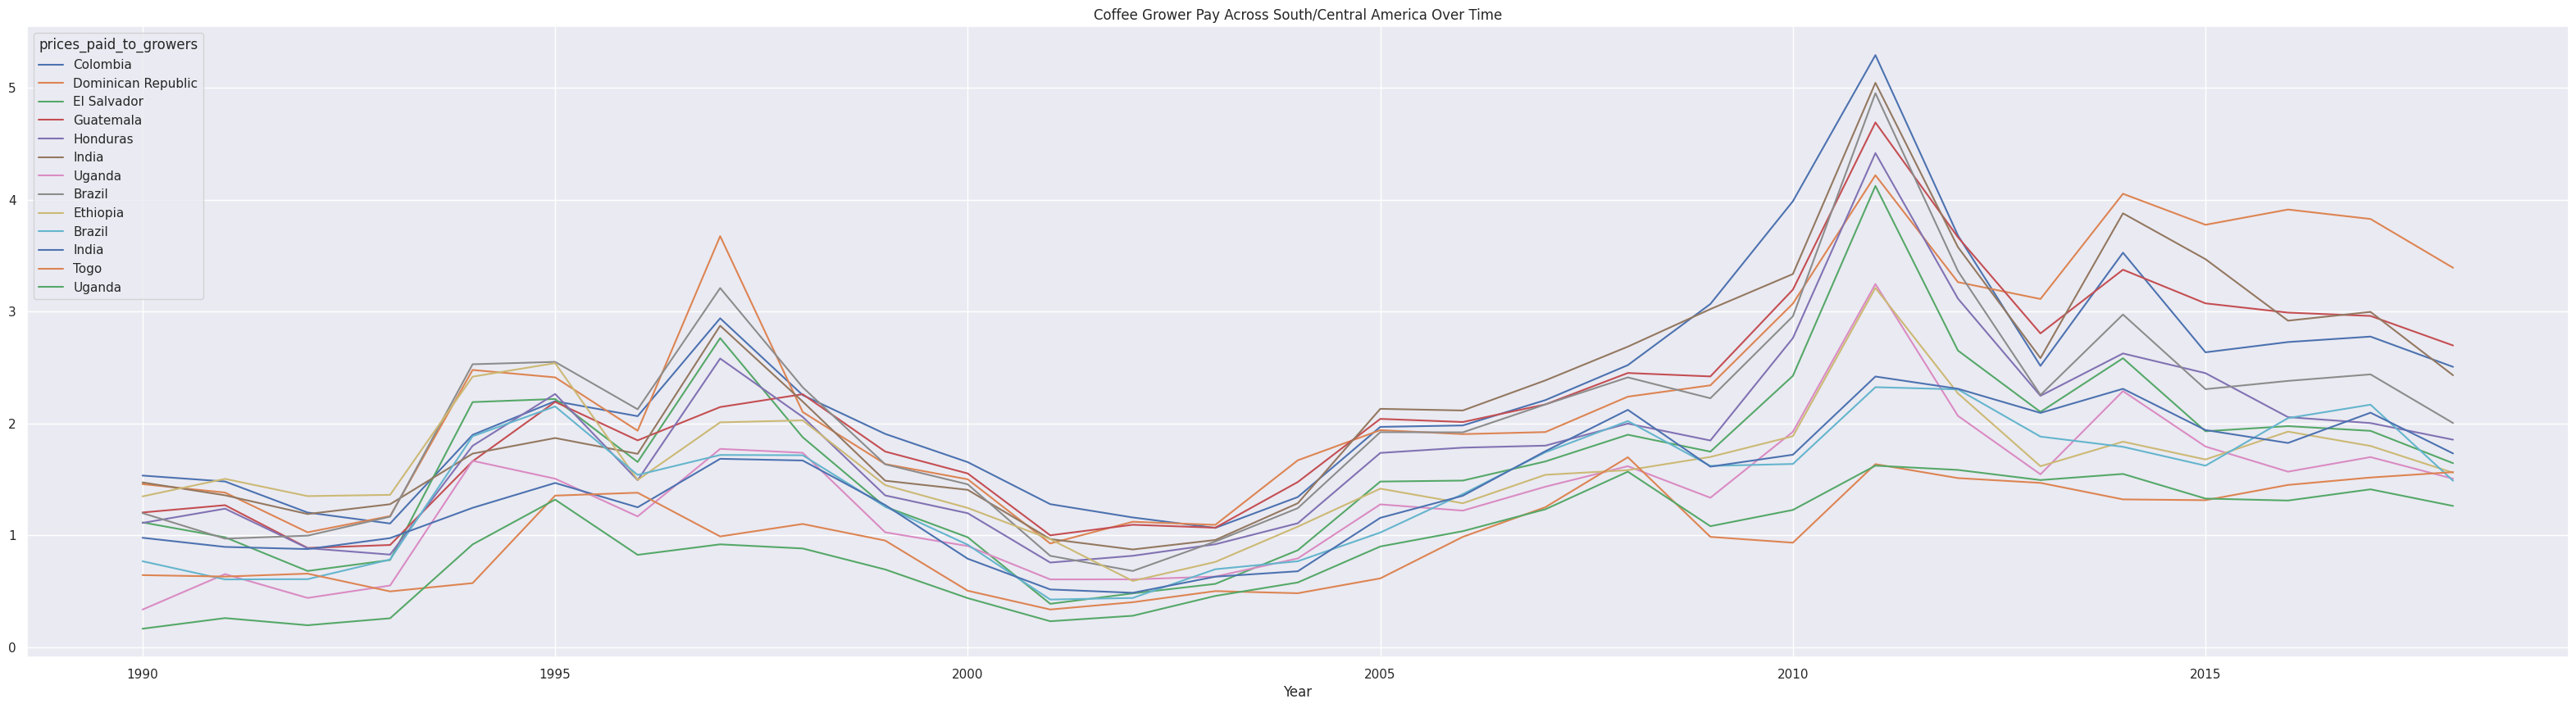

In [210]:
df = pd.read_csv('./data/prices-paid-to-growers.csv')

#Transpose the data frame
pivot2 = df.transpose()

#rename columns to row 1
pivot2.columns = pivot2.iloc[0]

#drop first two rows
pivot2 = pivot2.iloc[1:]

#rename index
pivot2.index.names = ['Year']
pivot2['Years'] = pivot2.index

pivot2.plot(title='Coffee Grower Pay Across South/Central America Over Time')

/tmp/ipykernel_35522/1253456881.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot2['average'] = df.mean()


<Axes: title={'center': 'Average Pay to Grower of Coffee Across Exporting Countries Over Time'}, xlabel='Year', ylabel='Pay per gram of Coffee'>

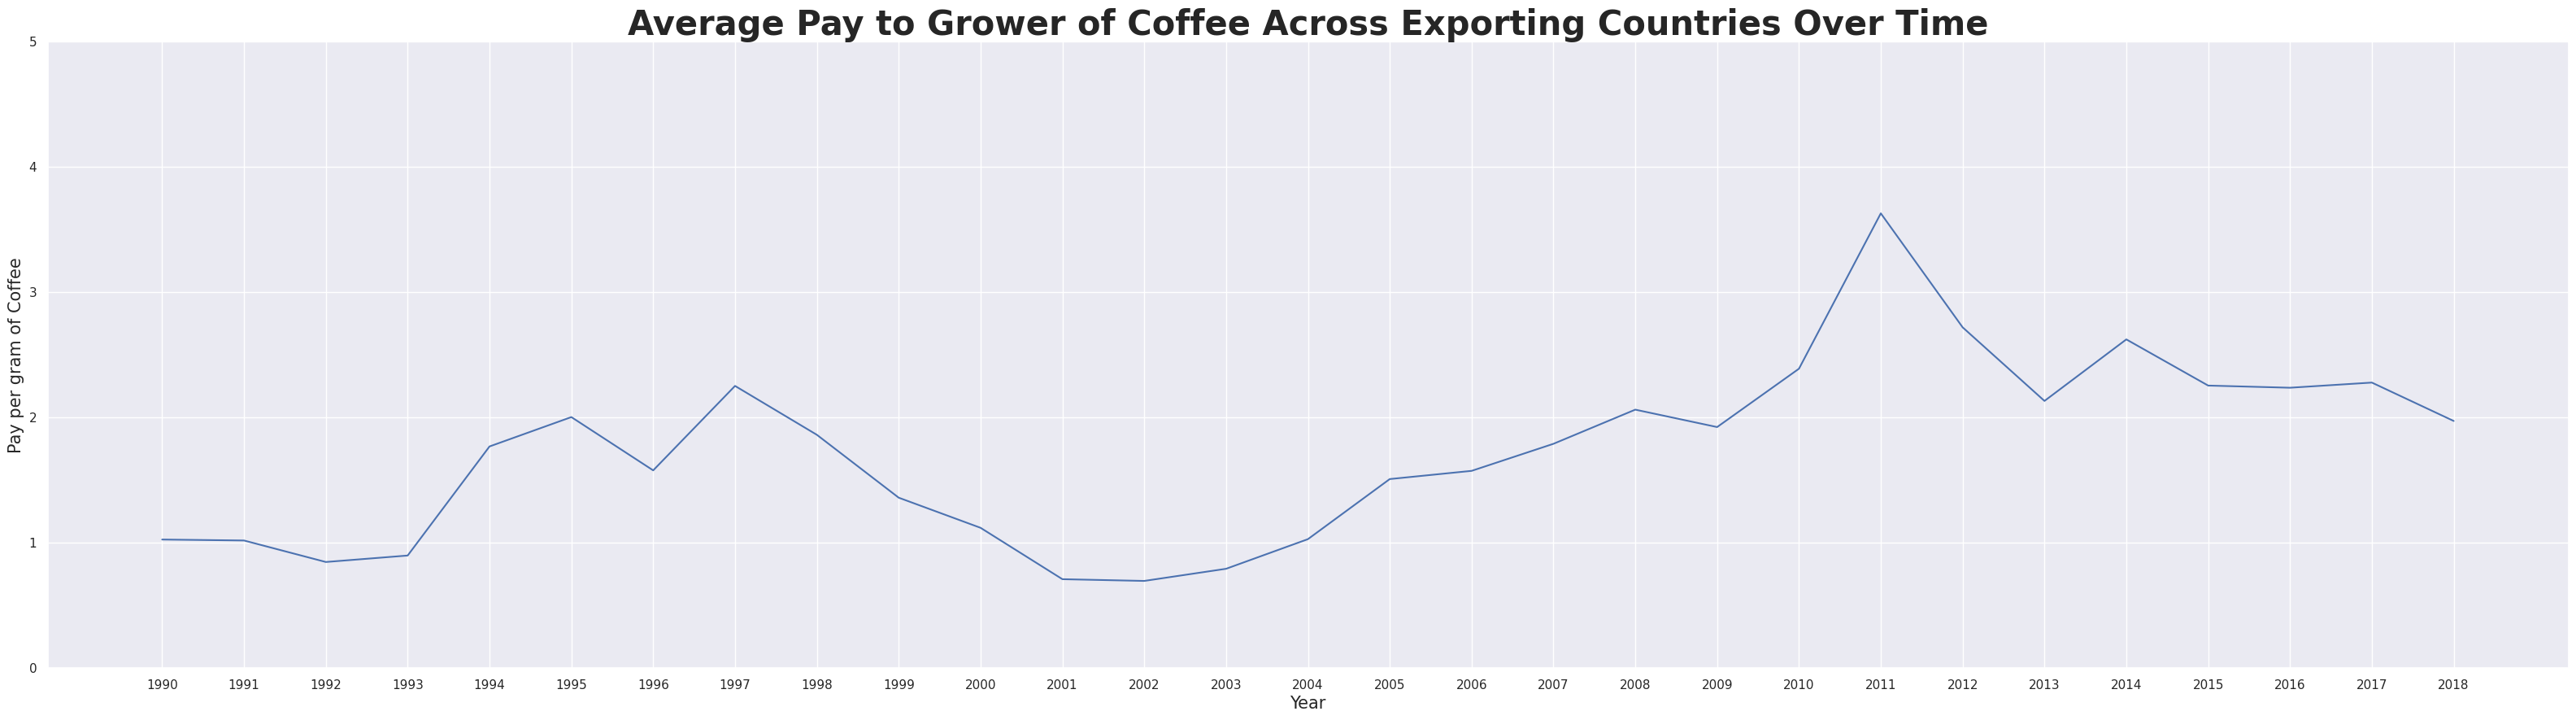

In [214]:
#Create line graph of average pay to growers
pivot2['average'] = df.mean()
avg_pay = sns.lineplot(data=pivot2['average'])
avg_pay.set_title('Average Pay to Grower of Coffee Across Exporting Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
avg_pay.set_xlabel('Year', fontdict={'size': 15})
avg_pay.set_ylabel('Pay per gram of Coffee', fontdict={'size': 15})
plt.ylim(0, 5)
avg_pay

In [215]:
#Combine average price to average pay over time
pivot.drop(pivot.columns.difference(['average']), 1, inplace=True)
avg_price = pivot.copy()
avg_price.rename(columns={'average': 'avg_price'}, inplace=True)

pivot2.drop(pivot2.columns.difference(['average']), 1, inplace=True)
avg_pay = pivot2.copy()
avg_pay.rename(columns={'average': 'avg_pay'}, inplace=True)

#Combine the two
compare_price_pay = pd.concat([avg_price, avg_pay], axis=1)
compare_price_pay.head()

/tmp/ipykernel_35522/2639866839.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot.drop(pivot.columns.difference(['average']), 1, inplace=True)
/tmp/ipykernel_35522/2639866839.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot2.drop(pivot2.columns.difference(['average']), 1, inplace=True)


,avg_price,avg_pay
Year,,
1990,10.386313,1.026493
1991,10.424156,1.018779
1992,10.532955,0.847206
1993,9.651529,0.898745
1994,10.994954,1.769350


<Axes: title={'center': 'Average Price of Coffee x Average Pay to Grower Over Time'}, xlabel='Year', ylabel='Price'>

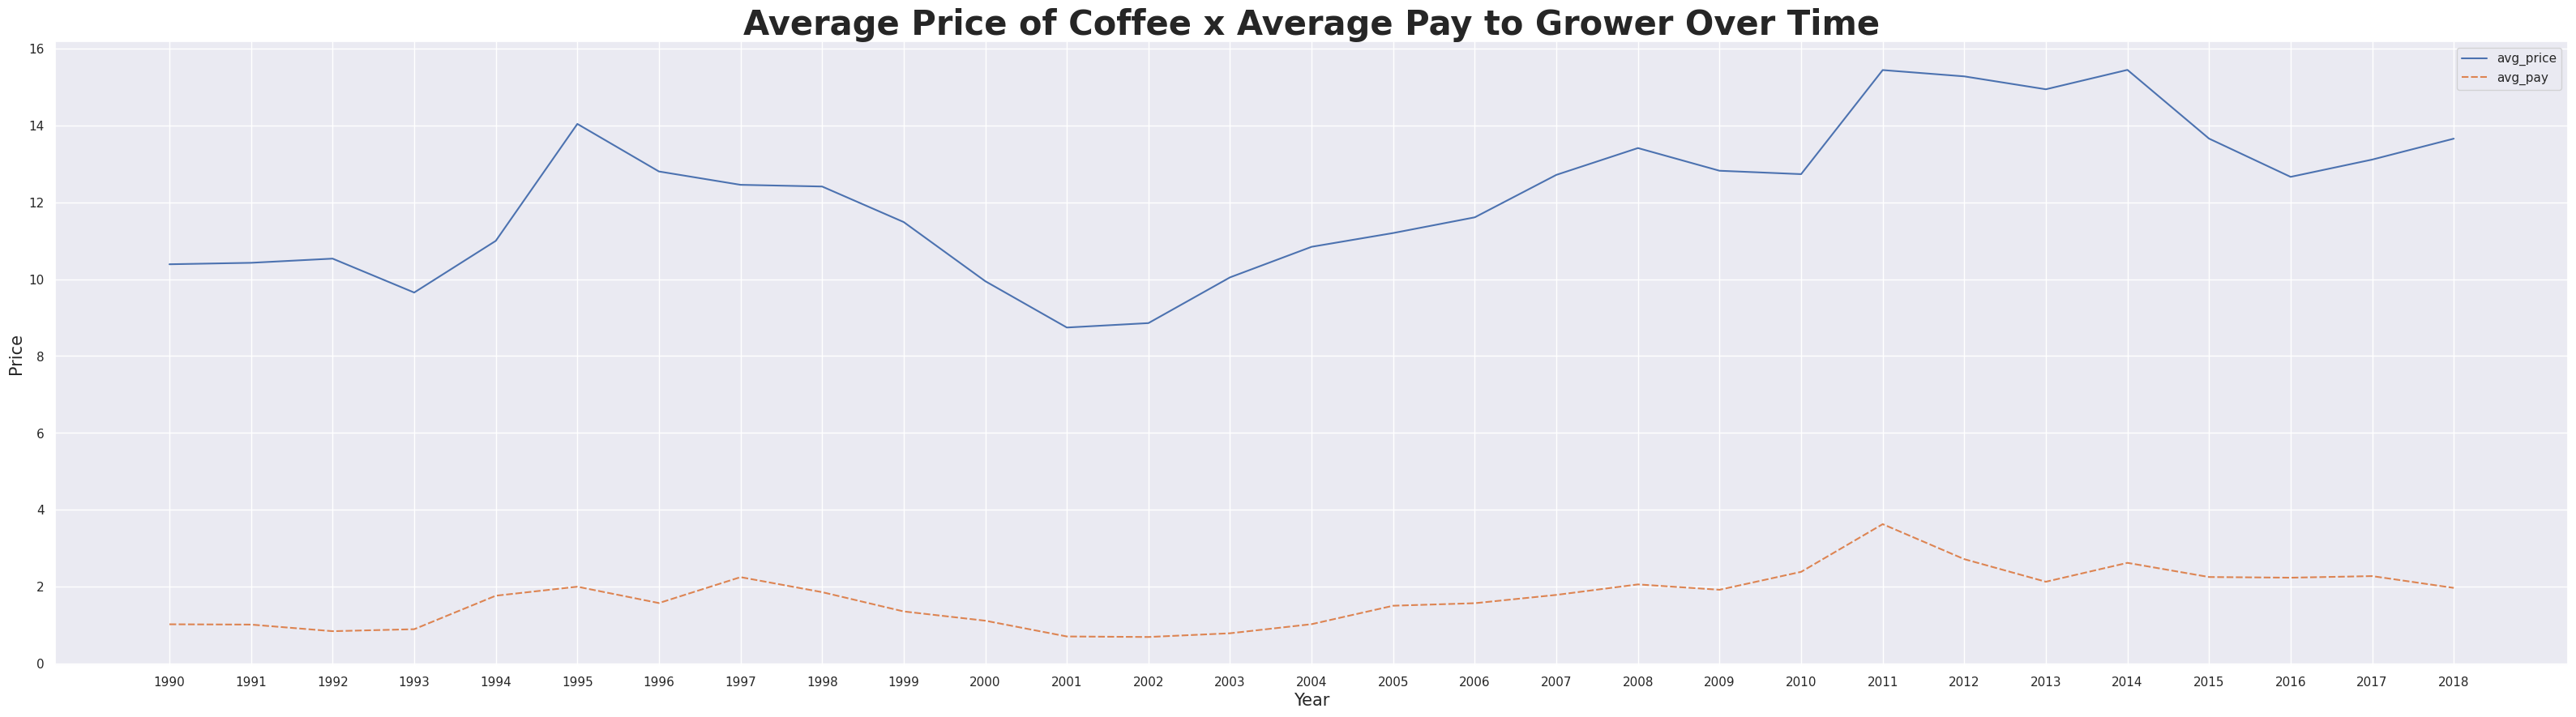

In [216]:
#Plot the two
price_pay_plot = sns.lineplot(data=compare_price_pay)
price_pay_plot.set_title('Average Price of Coffee x Average Pay to Grower Over Time', fontdict={'size': 30, 'weight': 'bold'})
price_pay_plot.set_xlabel('Year', fontdict={'size': 15})
price_pay_plot.set_ylabel('Price', fontdict={'size': 15})
price_pay_plot

# Predict average production over next few years

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop country column
    df = df.drop('country', axis=1)
    
    # Split df into X and y
    y = df['total_production']
    X = df.drop('total_production', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
#define our train set
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
#define algorithm for our model then fit it on the train set
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model trained.")

In [ ]:
#Create predicion models
y_pred = model.predict(X_test)

#Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE: {:.2f}".format(rmse))

#Calculate R^2 model, which demonstrates how much better your model is than the mean model
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print("R^2: {:.5f}".format(r2))

In [ ]:
!voila "Coffee_Analysis.ipynb" --template=gridstack